In [1]:
import thesis
import matplotlib.pyplot as plt
import pandas as pd
from geomappy.colors import legend_patches

In [2]:
df = pd.read_csv("data/nebraska.csv", index_col=0, skiprows=1)

In [3]:
# Conversion from feet to meters
df.wtd = df.wtd * 0.3048
df.rooting_depth = df.rooting_depth * 0.3048

In [4]:
df['colors'] = "Lightblue"
df.loc[(df.wtd - df.rooting_depth) < 1, 'colors'] = "Blue"
df.loc[(df.wtd - df.rooting_depth) > 10, 'colors'] = "Green"

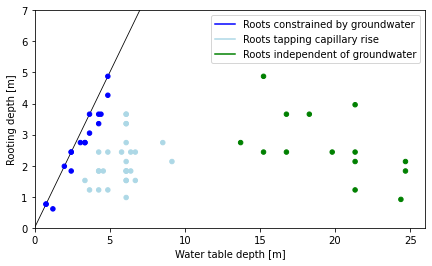

In [5]:
f, ax = plt.subplots(1, figsize=(7, 4))
ax.plot([0,7], [0,7], color='black', linewidth=0.8, zorder=0)
df.plot.scatter(x='wtd', y='rooting_depth', c='colors', ax=ax, colorbar=False)
ax.set_xlim(0, 26)
ax.set_ylim(0, 7)
ax.set_xlabel("Water table depth [m]")
ax.set_ylabel("Rooting depth [m]")
plt.legend(handles=legend_patches(labels=['Roots constrained by groundwater', 
                                 'Roots tapping capillary rise',
                                 'Roots independent of groundwater'], 
                         colors=['Blue',
                                 'Lightblue',
                                 'Green'], type='-'))
plt.savefig("figures/nebraska.png", dpi=300, bbox_inches='tight')